# Assignment 6 - Ignacio Gaitán
*This is the answer for Assignment 6 of Data Science Specialization MOOC of the University of Washington*
## Crime Analytics Overview
In this assignment, I will analyze criminal incident data from **Seattle** and **San Francisco** to visualize contrast and compare patterns across the two cities.

The assignment will be assessed by peer review.

### Some questions that should be nice to answer
1.  For either city, how do incidents vary by time of day? Which incidents are most common in the evening? During what periods of the day are robberies most common?
2. For either city, how do incidents vary by neighborhood? Which incidents are most common in the city center? In what areas or neighborhoods are robberies or thefts most common?
3. For either city, how do incidents vary month to month in the Summer 2014 dataset?
4. For either city, which incident types tend to correlate with each other on a day-by-day basis?
5. What can we infer broadly about the differences in crime patterns between Seattle and San Francisco? Does one city tend to have more crime than the other, per capita? Do the relative frequencies of types of incidents change materially between the two cities?

*Not every question will be answered in this submission.*

## Libraries used

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
%matplotlib inline

## Acquire data
The Python Pandas packages help me work with datasets. I will start by acquiring the **Seattle** and **San Francisco** datasets into Pandas DataFrames.

In [2]:
San_Francisco = pd.read_csv('../sanfrancisco_incidents_summer_2014.csv')
Seattle = pd.read_csv('../seattle_incidents_summer_2014.csv')

/home/user/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Analyze by describing data
Pandas helps describe the datasets.

I will look at the features available in the dataset by noting the feature names for directly manipulating or analyzing these.

In [3]:
print(Seattle.columns.values)
print('_'*80)
print(San_Francisco.columns.values)

['RMS CDW ID' 'General Offense Number' 'Offense Code'
 'Offense Code Extension' 'Offense Type' 'Summary Offense Code'
 'Summarized Offense Description' 'Date Reported'
 'Occurred Date or Date Range Start' 'Occurred Date Range End'
 'Hundred Block Location' 'District/Sector' 'Zone/Beat'
 'Census Tract 2000' 'Longitude' 'Latitude' 'Location' 'Month' 'Year']
________________________________________________________________________________
['IncidntNum' 'Category' 'Descript' 'DayOfWeek' 'Date' 'Time' 'PdDistrict'
 'Resolution' 'Address' 'X' 'Y' 'Location' 'PdId']


In [4]:
# preview the data of Seattle
Seattle.head()

,RMS CDW ID,General Offense Number,Offense Code,Offense Code Extension,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Census Tract 2000,Longitude,Latitude,Location,Month,Year
0,483839,2015218538,2202,0,BURGLARY-FORCE-RES,2200,BURGLARY,06/28/2015 10:31:00 AM,06/28/2014 10:31:00 AM,06/28/2015 10:31:00 AM,6XX BLOCK OF NW 74 ST,J,J2,2900.3013,-122.364672,47.682524,"(47.68252427, -122.364671996)",6,2014
1,481252,2015213067,2610,0,FRAUD-IDENTITY THEFT,2600,FRAUD,06/24/2015 11:09:00 AM,06/01/2014 12:00:00 AM,06/24/2015 11:09:00 AM,23XX BLOCK OF 43 AV E,C,C2,6300.1004,-122.277080,47.639901,"(47.639900761, -122.277080248)",6,2014
2,481375,2015210301,2316,0,THEFT-MAIL,2300,MAIL THEFT,06/22/2015 09:22:00 AM,08/31/2014 09:00:00 AM,NaN,81XX BLOCK OF 11 AV SW,F,F3,11300.5013,-122.349312,47.529232,"(47.529232299, -122.349312181)",8,2014
3,481690,2015209327,2599,0,COUNTERFEIT,2500,COUNTERFEIT,06/21/2015 03:52:00 PM,06/20/2014 01:38:00 PM,NaN,6XX BLOCK OF PINE ST,M,M2,8200.1002,-122.334818,47.612368,"(47.612368448, -122.334817763)",6,2014
4,478198,2015207880,2399,3,THEFT-OTH,2300,OTHER PROPERTY,06/20/2015 11:59:00 AM,06/01/2014 11:59:00 AM,11/01/2014 12:00:00 PM,77XX BLOCK OF SUNNYSIDE AV N,J,J3,2700.2015,-122.329379,47.685960,"(47.685959879, -122.329378505)",6,2014


In [5]:
# preview the data of San Francisco
San_Francisco.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


In [6]:
# Lets look at the information types in our sets
Seattle.info()
print('_'*80)
San_Francisco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32779 entries, 0 to 32778
Data columns (total 19 columns):
RMS CDW ID                           32779 non-null int64
General Offense Number               32779 non-null int64
Offense Code                         32779 non-null object
Offense Code Extension               32779 non-null int64
Offense Type                         32779 non-null object
Summary Offense Code                 32779 non-null object
Summarized Offense Description       32779 non-null object
Date Reported                        32779 non-null object
Occurred Date or Date Range Start    32779 non-null object
Occurred Date Range End              16499 non-null object
Hundred Block Location               32779 non-null object
District/Sector                      32722 non-null object
Zone/Beat                            32723 non-null object
Census Tract 2000                    32645 non-null float64
Longitude                            32779 non-null float64
Latitud

In [7]:
Seattle.describe(include=['O'])

,Offense Code,Offense Type,Summary Offense Code,Summarized Offense Description,Date Reported,Occurred Date or Date Range Start,Occurred Date Range End,Hundred Block Location,District/Sector,Zone/Beat,Location
count,32779,32779,32779,32779,32779,32779,16499,32779,32722,32723,32779
unique,92,147,26,48,15766,11557,5934,7924,18,52,12970
top,2305,THEFT-CARPROWL,2300,CAR PROWL,08/04/2014 07:00:00 PM,07/01/2014 12:00:00 AM,07/07/2014 07:00:00 AM,4XX BLOCK OF NE NORTHGATE WY,M,E2,"(0.0, 0.0)"
freq,6230,6230,12161,6230,11,46,21,194,2642,1089,2050


In [8]:
San_Francisco.describe(include=['O'])

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,Location
count,28993,28993,28993,28993,28993,28993,28993,28993,28993
unique,34,368,7,92,1379,10,16,8055,8732
top,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,08/09/2014,12:00,SOUTHERN,NONE,800 Block of BRYANT ST,"(37.775420706711, -122.403404791479)"
freq,9466,3766,4451,410,784,5739,19139,948,940


In [9]:
Seattle.describe()

,RMS CDW ID,General Offense Number,Offense Code Extension,Census Tract 2000,Longitude,Latitude,Month,Year
count,3.277900e+04,3.277900e+04,32779.000000,32645.000000,32779.000000,32779.000000,32779.000000,32779.0
mean,5.786503e+05,2.019999e+09,4.199793,6737.664956,-114.680394,44.646274,6.980933,2014.0
std,4.876735e+05,1.111669e+09,12.028941,3300.797625,29.620933,11.531858,0.812021,0.0
min,1.247000e+04,2.015135e+07,0.000000,100.100100,-122.425315,0.000000,6.000000,2014.0
25%,4.724550e+04,2.014207e+09,0.000000,4600.100000,-122.346076,47.580045,6.000000,2014.0
50%,9.998590e+05,2.014243e+09,0.000000,7500.400700,-122.328713,47.614196,7.000000,2014.0
75%,1.030116e+06,2.014277e+09,1.000000,9200.201300,-122.307333,47.664051,8.000000,2014.0
max,1.125252e+06,2.014142e+11,98.000000,26500.100200,0.000000,47.749606,8.000000,2014.0


In [10]:
San_Francisco.describe()

,IncidntNum,X,Y,PdId
count,2.899300e+04,28993.000000,28993.000000,2.899300e+04
mean,1.420173e+08,-122.421961,37.768911,1.420173e+13
std,1.853367e+07,0.025313,0.023604,1.853367e+12
min,1.028438e+07,-122.513642,37.708083,1.028439e+12
25%,1.405456e+08,-122.432224,37.756486,1.405456e+13
50%,1.406320e+08,-122.415633,37.775421,1.406320e+13
75%,1.407197e+08,-122.406521,37.785094,1.407197e+13
max,9.903674e+08,-122.365565,37.817315,9.903674e+13


## Visualizing data
*From now on I chose to work only with the dataset of San_Francisco becase of its simplicity.*

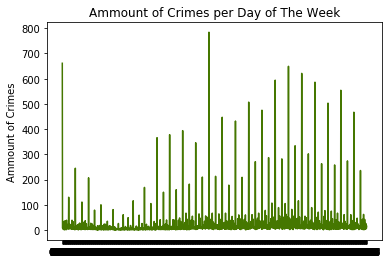

In [11]:
#For either city, how do incidents vary by time of day? 
#Which incidents are most common in the evening? 
#During what periods of the day are robberies most common?
#g = sns.FacetGrid(San_Francisco, size=5, aspect=1.8)
#g.map(sns.barplot,'DayOfWeek','IncidntNum')
#g.add_legend()
width=.5
per_day=San_Francisco[['Time', 'Resolution']].groupby(['Time'], as_index=False).count().sort_values(by='Time', ascending=False)
#print(per_day)
p1=plt.plot(per_day['Time'],per_day['Resolution'],width,color='#457700')

plt.ylabel('Ammount of Crimes')
plt.title('Ammount of Crimes per Day of The Week')
#plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
#plt.yticks(np.arange(0,6001, 1000))
#plt.legend(p1,'Men')
plt.show()

#IncidntNum    28993 non-null int64
#Category      28993 non-null object
#Descript      28993 non-null object
#DayOfWeek     28993 non-null object
#Date          28993 non-null object
#Time          28993 non-null object
#PdDistrict    28993 non-null object
#Resolution    28993 non-null object
#Address       28993 non-null object
#X             28993 non-null float64
#Y             28993 non-null float64
#Location      28993 non-null object
#PdId          28993 non-null int64

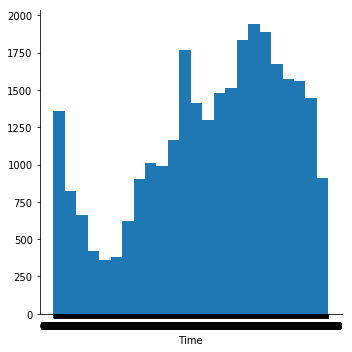

In [12]:
grid = sns.FacetGrid(San_Francisco, size=5)
grid.map(plt.hist,'Time', bins=24)

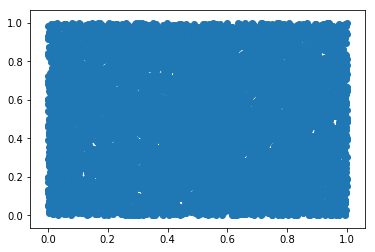

In [13]:
N=10000
x=np.random.rand(N)
y=np.random.rand(N)
colors=np.random.rand(N)
area=np.pi*(15*np.random.rand(N))**2 #0 to 15 point radiuses
plt.scatter(x,y)#,s=area,c=colors,alpha=0.5)
plt.show()